# Interpolación de Lagrange


---
**Entrada:** $n + 1$ números reales **diferentes** $x_{0}, x_{1}, x_{2} \ldots ,x_{n}$ y $ n + 1$ números reales $y_{0}, y_{1}, y_{2}, \ldots ,y_{n} $.

**Salida:** Un polinomio $p_{n}$ de grado menor o igual a $n$ que cumpla la propiedad de interpolación:

 $$ p_{n}(x_{i}) = y_{i}$$ 
 
para $i = 0,  1, 2, \ldots , n$.

---

## Dependencias

In [1]:
from sympy import * # Usaremos SymPy como herramienta para realizar manipulaciones simbólicas

# Las siguientes dos librerías serán utilizadas para graficar
import matplotlib.pyplot as plt;
import numpy as np

# Usaremos lo siguiente para mostrar los polinomios de forma bonita
from sympy.interactive import printing;
printing.init_printing(use_latex=True);
from IPython.display import display, Latex

Ahora declaramos $\texttt{x}$ como un símbolo, que representará nuestra variable en el polinomio.

In [2]:
x = Symbol('x')

Como ejercicio, vamos a construir el polinomio cuadrático de Lagrange para la función $\sin(\pi x)$ con nodos $x_{0} = 1, x_{1} = 1.25, x_{2} = 1.6$.

## Datos de entrada

In [3]:
def f(z):
    return sin(pi*z)

xs = [1, 1.25, 1.6]
ys = [f(1), f(1.25), f(1.6)]

Desarrollando la fórmula de Lagrange:

$$ p_{2}(x) = \sum_{k=0}^{2} y_{k} \ell_{k}(x)  =  y_{0} \ell_{0}(x)  + y_{1} \ell_{1}(x)  +   y_{2} \ell_{2}(x) $$

donde

$$\ell_{k}(x) = \prod_{i = 0, i \neq k}^{2} \frac{x - x_{i}}{x_{k} - x_{i}}. $$

Así, 

$$ p_{2}(x) =  y_{0}  \frac{(x - x_{1}) (x - x_{2})}{ (x_{0} - x_{1})(x_{0} - x_{2})} +  y_{1}  \frac{(x - x_{0}) (x - x_{2})}{ (x_{1} - x_{0})(x_{1} - x_{2})} + y_{2}  \frac{(x - x_{0}) (x - x_{1})}{ (x_{2} - x_{0})(x_{2} - x_{1})}.$$

In [4]:
'''
Esta función calcula la función base correspondiente. Es una traducción directa de la fórmula.
xs: arreglo con valores en x
degree: grado del polinomio, índice superior del producto
k: índice de la función base 
'''    
def lagrangeBasisFunction(xs, degree, k):
    L = 1.0
    for i in range(0, degree + 1):
        if i == k:
            continue
        else:
            L *= (x - xs[i])/(xs[k] - xs[i])
    return L        

'''
Esta función calcula la combinación lineal. Es una traducción directa de la fórmula e 
invoca la función lagrangeBasisFunction para calcular las funciones base.
xs: arreglo con valores en x
ys: arreglo con valores en y
degree: grado del polinomio
'''
def lagrangePolynomial(xs, ys, degree):
    polynomial = 0.0;
    for i in range(0, degree + 1):
        polynomial += ys[i]*lagrangeBasisFunction(xs, degree, i)
    return polynomial    

Ahora construimos el polinomio, lo guardamos en la variable $\texttt{pol}$ y lo mostramos, luego de hacer simplificaciones con la función $\texttt{simplify}$ de SymPy:

In [5]:
pol = lagrangePolynomial(xs, ys, 2)
display(Latex('$$ p_{2}(x) = '+ latex(simplify(pol.evalf())) + '$$'))

<IPython.core.display.Latex object>

Si deseamos evaluar algún punto en este polinomio, por ejemplo $p_{2}(1.6)$, escribimos

In [6]:
pol.subs(x, 1.6).evalf()

Observemos que 

In [8]:
f(1.6).evalf()

Debe notarse que el polinomio de interpolación difiere de la función que aproxima, salvo en los nodos, donde es (teóricamente) igual a la función.

Ahora graficamos, usando las herramientas que ofrecen la librerías $\texttt{matplotlib}$ y $\texttt{numpy}$:

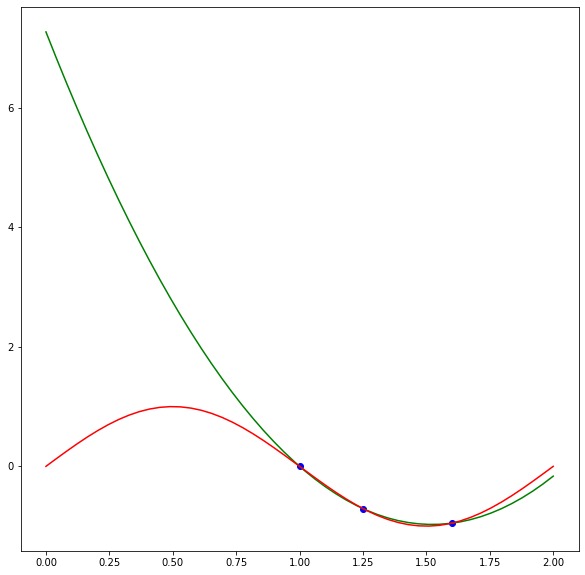

In [9]:
fig, ax = plt.subplots(figsize=(10, 10));

lambdaf = lambdify(x, pol)

xv = np.linspace(0, 2, 50);
ax.plot(xv, lambdaf(xv), color='green');
ax.plot(xv, np.sin(np.pi*xv), color = 'red')
ax.scatter(xs, ys, color='blue', marker='o');
plt.show(); 

En rojo se muestra la función $\sin(\pi x)$ y en verde el polinomio cuadrático de interpolación. En azul los nodos. Queda de ejercicio para el lector producir el polinomio de grado $3$ y escribir su fórmula agregando el nodo $x_{3} = 2.0$. 